<a href="https://colab.research.google.com/github/jessicasilvacodes/visao_computacional-pucminas/blob/main/04_keras_extract_features_JessicaSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using a pre-trained convnet to feature extraction**


In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip

--2025-10-10 18:26:25--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   282MB/s    in 0.2s    

2025-10-10 18:26:26 (282 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip = 'cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/')
zip_ref.close()

In [3]:
import tensorflow.keras

In [4]:
from tensorflow.keras.applications.vgg16 import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'data/cats_and_dogs_filtered/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
# test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/

In [7]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
# test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [8]:
print (train_features.shape)
print (train_features[1])

(2000, 8192)
[0.31015119 0.         0.         ... 0.         0.23312539 0.        ]


In [9]:
dist = np.sqrt(np.sum(np.square(np.subtract(train_features[18], train_features[24]))))

In [10]:
print (dist)

35.12277662462246


Referência: François Chollet. Deep Learning with Python. November 2017  

**Mais um exemplo (uma imagem por vez)**

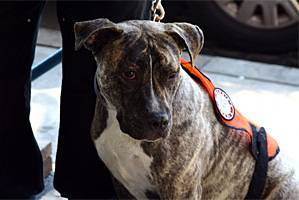

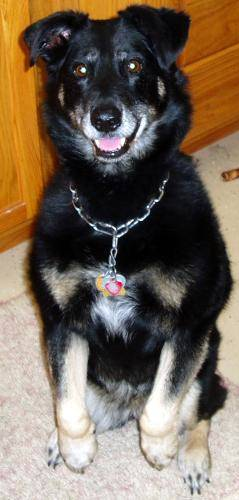

In [11]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

path1 = os.path.join(base_dir, 'validation/dogs/dog.2010.jpg')
img1 = cv2.imread(path1)
cv2_imshow(img1)


path2 = os.path.join(base_dir, 'validation/dogs/dog.2011.jpg')
img2 = cv2.imread(path2)
cv2_imshow(img2)

In [12]:
print(img1.shape)
print(img2.shape)

(200, 299, 3)
(500, 239, 3)


Vamos carregar a imagem usando PIL (biblioteca para processamento de imagens em Python)

In [13]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from PIL import Image

img1 = load_img(path1, target_size=(150, 150))
img2 = load_img(path2, target_size=(150, 150))

Rescale de cada pixels de (0 a 255) para [0, 1]

In [14]:
from numpy import asarray

## img1

img1 = asarray(img1)

print('Data Type: %s' % img1.dtype)
print('Min: %.3f, Max: %.3f' % (img1.min(), img1.max()))

img1 = img1.astype('float32')
img1 /= 255.0

print('Min: %.3f, Max: %.3f' % (img1.min(), img1.max()))

### img2

img2 = asarray(img2)

print('Data Type: %s' % img2.dtype)
print('Min: %.3f, Max: %.3f' % (img2.min(), img2.max()))

img2 = img2.astype('float32')
img2 /= 255.0

print('Min: %.3f, Max: %.3f' % (img2.min(), img2.max()))


Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000
Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


In [15]:
x = img_to_array(img1)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

print(x.shape)

y = img_to_array(img2)  # this is a Numpy array with shape (3, 150, 150)
y = y.reshape((1,) + y.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

print(y.shape)

(1, 150, 150, 3)
(1, 150, 150, 3)


In [16]:
features_x = conv_base.predict(x)
features_y = conv_base.predict(y)

print(features_x.shape)
print(features_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
(1, 4, 4, 512)
[[[[1.1471716e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    5.8887672e-01 0.0000000e+00]
   [8.8540477e-01 0.0000000e+00 3.2649142e-01 ... 0.0000000e+00
    7.9689741e-02 0.0000000e+00]
   [5.0411803e-01 0.0000000e+00 9.1128659e-01 ... 0.0000000e+00
    5.9336424e-04 0.0000000e+00]
   [3.9777941e-01 0.0000000e+00 7.3424721e-01 ... 0.0000000e+00
    8.3622468e-01 0.0000000e+00]]

  [[1.6845027e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
    5.3270161e-02 0.0000000e+00]
   [1.0901929e+00 0.0000000e+00 1.5667966e-01 ... 4.8164645e-01
    6.1919725e-01 0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 2.2806317e-01 ... 1.3242699e-01
    2.0896095e-01 0.0000000e+00]
   [1.9397701e-01 0.0000000e+00 6.2893867e-01 ... 0.0000000e+00
    6.6122657e-01 0.0000000e+00]]

  [[1.3758727e+00 0.0000000e+00 8.9063555e-02 ... 0.0000000e+00
    3.5475269e-01 0.0000000e+00]
   [1.0933441e+00 0.0000000e+00 9.

In [17]:
features_x = np.reshape(features_x, (1, 4 * 4 * 512))
features_y = np.reshape(features_y, (1, 4 * 4 * 512))

In [18]:
print(features_x.shape)

(1, 8192)


In [19]:
dist = np.sqrt(np.sum(np.square(np.subtract(features_x, features_y))))

In [20]:
print(dist)

37.315845
